In [ ]:
%pip install fastf1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.4/130.4 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 21.0 MB/s eta 0:00:00


In [ ]:
import fastf1 as ff1
from fastf1 import plotting
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.collections import LineCollection
from matplotlib import cm
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
from timple.timedelta import strftimedelta
from fastf1.core import Laps

In [ ]:
# Configurar gráficos
ff1.plotting.setup_mpl()

# Habilitamos el cache en nuestro equipo
#ff1.Cache.enable_cache('cache')

# Ignoramos los Warning
pd.options.mode.chained_assignment = None

In [ ]:
race = ff1.get_session(2024, 'Monaco', 'R')
quali = ff1.get_session(2024, 'Monaco', 'Q')

DEBUG:requests_cache.policy.actions:Cache directives from request headers: CacheDirectives()
DEBUG:requests_cache.policy.actions:Pre-read cache checks: Passed
DEBUG:requests_cache.policy.actions:Post-read cache actions: CacheActions(expire_after=datetime.timedelta(seconds=43200), send_request=True)
DEBUG:urllib3.connectionpool:Resetting dropped connection: raw.githubusercontent.com
DEBUG:urllib3.connectionpool:https://raw.githubusercontent.com:443 "GET /theOehrly/f1schedule/master/schedule_2024.json HTTP/1.1" 304 0
DEBUG:requests_cache.policy.actions:Cache directives from response headers: CacheDirectives(expires='Sat, 01 Jun 2024 23:40:10 GMT', max_age=300, etag='W/"2309016eeed0e5f9ca84773499b1102fecc83dec9de40adc794b195e84c40f2a"')
DEBUG:requests_cache.policy.actions:Pre-write cache checks: disabled status
DEBUG:requests_cache.policy.actions:Response for URL https://raw.githubusercontent.com/theOehrly/f1schedule/master/schedule_2024.json has not been modified
DEBUG:requests_cache.pol

In [ ]:
race.load()
quali.load()

core           INFO 	Loading data for Monaco Grand Prix - Race [v3.3.7]
INFO:fastf1.fastf1.core:Loading data for Monaco Grand Prix - Race [v3.3.7]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
DEBUG:requests_cache.policy.actions:Cache directives from request headers: CacheDirectives()
DEBUG:requests_cache.policy.actions:Pre-read cache checks: Passed
DEBUG:requests_cache.policy.actions:Post-read cache actions: CacheActions(expire_after=datetime.timedelta(seconds=43200), resend_request=True)
DEBUG:requests_cache.session:Stale response; attempting to re-send request
DEBUG:urllib3.connectionpool:Resetting dropped connection: ergast.com
DEBUG:urllib3.connectionpool:https://ergast.com:443 "GET /api/f1/2024/8/results.json HTTP/1.1" 200 10357
DEBUG:requests_cache.policy.actions:Cache directives from response headers:

# **Standings**
# Qualifyng

In [ ]:
q=quali.results
qua=pd.DataFrame(q)
pdq=['DriverNumber','Abbreviation','Position','Q1','Q2','Q3']
qpd=qua[pdq]
qpd

,DriverNumber,Abbreviation,Position,Q1,Q2,Q3
16,16,LEC,1.0,0 days 00:01:11.584000,0 days 00:01:10.825000,0 days 00:01:10.270000
81,81,PIA,2.0,0 days 00:01:11.500000,0 days 00:01:10.756000,0 days 00:01:10.424000
55,55,SAI,3.0,0 days 00:01:11.543000,0 days 00:01:11.075000,0 days 00:01:10.518000
4,4,NOR,4.0,0 days 00:01:11.760000,0 days 00:01:10.732000,0 days 00:01:10.542000
63,63,RUS,5.0,0 days 00:01:11.492000,0 days 00:01:10.929000,0 days 00:01:10.543000
1,1,VER,6.0,0 days 00:01:11.711000,0 days 00:01:10.745000,0 days 00:01:10.567000
44,44,HAM,7.0,0 days 00:01:11.528000,0 days 00:01:11.056000,0 days 00:01:10.621000
22,22,TSU,8.0,0 days 00:01:11.852000,0 days 00:01:11.106000,0 days 00:01:10.858000
23,23,ALB,9.0,0 days 00:01:11.623000,0 days 00:01:11.216000,0 days 00:01:10.948000
10,10,GAS,10.0,0 days 00:01:11.714000,0 days 00:01:10.896000,0 days 00:01:11.311000


# Race

In [ ]:
race_res=pd.DataFrame(race.results)
racedf = ['BroadcastName','Abbreviation', 'TeamName','GridPosition','Position','Status','Points','Time',]
dfrace = race_res[racedf]
dfrace

,BroadcastName,Abbreviation,TeamName,GridPosition,Position,Status,Points,Time
16,C LECLERC,LEC,Ferrari,1.0,1.0,Finished,25.0,0 days 02:23:15.554000
81,O PIASTRI,PIA,McLaren,2.0,2.0,Finished,18.0,0 days 00:00:07.152000
55,C SAINZ,SAI,Ferrari,3.0,3.0,Finished,15.0,0 days 00:00:07.585000
4,L NORRIS,NOR,McLaren,4.0,4.0,Finished,12.0,0 days 00:00:08.650000
63,G RUSSELL,RUS,Mercedes,5.0,5.0,Finished,10.0,0 days 00:00:13.309000
1,M VERSTAPPEN,VER,Red Bull Racing,6.0,6.0,Finished,8.0,0 days 00:00:13.853000
44,L HAMILTON,HAM,Mercedes,7.0,7.0,Finished,7.0,0 days 00:00:14.908000
22,Y TSUNODA,TSU,RB,8.0,8.0,+1 Lap,4.0,NaT
23,A ALBON,ALB,Williams,9.0,9.0,+1 Lap,2.0,NaT
10,P GASLY,GAS,Alpine,10.0,10.0,+1 Lap,1.0,NaT


In [ ]:
laps_r = race.load()
laps_q = quali.load()

core           INFO 	Loading data for Monaco Grand Prix - Race [v3.3.7]
INFO:fastf1.fastf1.core:Loading data for Monaco Grand Prix - Race [v3.3.7]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
INFO:fastf1.fastf1.req:Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
INFO:fastf1.fastf1.req:Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
INFO:fastf1.fastf1.req:Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
INFO:fastf1.fastf1.req:Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
INFO:fastf1.fastf1.req:Using cached data for timing_app_data
core           

# Fastest lap

In [ ]:
fastest_lap = race.laps.pick_fastest()
print(f'Vuelta más rápida: ',fastest_lap['LapTime'])
print(f'Tipo de neumático: ',fastest_lap['Compound'])
print(f'Lap number: ',fastest_lap['LapNumber'])
print(f'Neumático nuevo: ',fastest_lap['FreshTyre'])
print(f'TyeLife: ',fastest_lap['TyreLife'])
print(f'Piloto: ',fastest_lap['Driver'])

Vuelta más rápida:  0 days 00:01:14.165000
Tipo de neumático:  HARD
Lap number:  63.0
Neumático nuevo:  False
TyeLife:  13.0
Piloto:  HAM


In [ ]:
fastest_lapq = quali.laps.pick_fastest()
fastest_lapq

Time                      0 days 01:12:23.964000
Driver                                       LEC
DriverNumber                                  16
LapTime                   0 days 00:01:10.270000
LapNumber                                   25.0
Stint                                        6.0
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:18.386000
Sector2Time               0 days 00:00:33.174000
Sector3Time               0 days 00:00:18.710000
Sector1SessionTime        0 days 01:11:32.080000
Sector2SessionTime        0 days 01:12:05.254000
Sector3SessionTime        0 days 01:12:23.964000
SpeedI1                                    222.0
SpeedI2                                    208.0
SpeedFL                                    269.0
SpeedST                                    280.0
IsPersonalBest                              True
Compound                                    SOFT
TyreLife            

In [ ]:
qualilaps=quali.laps.pick_driver('LEC')
racelaps=race.laps.pick_driver('HAM')
qualilaps

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 00:17:37.749000,LEC,16,0 days 00:01:47.009000,1.0,1.0,0 days 00:15:51.382000,NaT,0 days 00:00:33.194000,0 days 00:00:44.490000,...,True,Ferrari,0 days 00:15:51.382000,2024-05-25 14:02:56.065,1,NaN,False,,False,False
1,0 days 00:18:50.588000,LEC,16,0 days 00:01:12.839000,2.0,1.0,NaT,NaT,0 days 00:00:19.297000,0 days 00:00:34.137000,...,True,Ferrari,0 days 00:17:37.749000,2024-05-25 14:04:42.432,1,NaN,False,,False,True
2,0 days 00:20:27.621000,LEC,16,0 days 00:01:37.033000,3.0,1.0,NaT,NaT,0 days 00:00:27.498000,0 days 00:00:43.667000,...,True,Ferrari,0 days 00:18:50.588000,2024-05-25 14:05:55.271,1,NaN,False,,False,True
3,0 days 00:21:40.073000,LEC,16,0 days 00:01:12.452000,4.0,1.0,NaT,NaT,0 days 00:00:18.794000,0 days 00:00:34.388000,...,True,Ferrari,0 days 00:20:27.621000,2024-05-25 14:07:32.304,1,NaN,False,,False,True
4,0 days 00:23:36.311000,LEC,16,0 days 00:01:56.238000,5.0,1.0,NaT,0 days 00:22:54.986000,0 days 00:00:21.593000,0 days 00:00:38.423000,...,True,Ferrari,0 days 00:21:40.073000,2024-05-25 14:08:44.756,1,NaN,False,,False,False
5,0 days 00:25:18.839000,LEC,16,0 days 00:01:42.528000,6.0,2.0,0 days 00:23:37.442000,NaT,0 days 00:00:31.705000,0 days 00:00:42.437000,...,False,Ferrari,0 days 00:23:36.311000,2024-05-25 14:10:40.994,1,NaN,False,,False,False
6,0 days 00:26:30.492000,LEC,16,0 days 00:01:11.653000,7.0,2.0,NaT,NaT,0 days 00:00:18.702000,0 days 00:00:33.831000,...,False,Ferrari,0 days 00:25:18.839000,2024-05-25 14:12:23.522,12,NaN,False,,False,True
7,0 days 00:28:10.284000,LEC,16,0 days 00:01:39.792000,8.0,2.0,NaT,NaT,0 days 00:00:22.608000,0 days 00:00:40.264000,...,False,Ferrari,0 days 00:26:30.492000,2024-05-25 14:13:35.175,1,NaN,False,,False,True
8,0 days 00:29:21.868000,LEC,16,0 days 00:01:11.584000,9.0,2.0,NaT,NaT,0 days 00:00:18.597000,0 days 00:00:33.825000,...,False,Ferrari,0 days 00:28:10.284000,2024-05-25 14:15:14.967,1,NaN,False,,False,True
9,0 days 00:38:31.485000,LEC,16,NaT,10.0,2.0,NaT,0 days 00:30:51.141000,0 days 00:00:23.219000,0 days 00:00:45.996000,...,False,Ferrari,0 days 00:29:21.868000,2024-05-25 14:16:26.551,12,NaN,False,,False,False


In [ ]:
qualibstlap=qualilaps[qualilaps.LapNumber==25]
racebstlap=racelaps[racelaps.LapNumber==62]

In [ ]:
print(f'Tiempo de la mejor vuelta Calificación: ',qualibstlap.LapTime)
print(f'Tiempo de la mejor vuelta Carrera: ',racebstlap.LapTime)

Tiempo de la mejor vuelta Calificación:  24   0 days 00:01:10.270000
Name: LapTime, dtype: timedelta64[ns]
Tiempo de la mejor vuelta Carrera:  529   0 days 00:01:15.414000
Name: LapTime, dtype: timedelta64[ns]


In [ ]:
quali_cdata = qualibstlap.get_car_data().add_distance()
race_cdata = racebstlap.get_car_data().add_distance()

In [ ]:
race_cdata

,Date,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,SessionTime,Distance
0,2024-05-26 15:06:33.941,11217,271,7,100,False,0,car,0 days 00:00:00.367000,0 days 02:58:28.552000,27.626944
1,2024-05-26 15:06:34.221,11326,274,7,100,False,0,car,0 days 00:00:00.647000,0 days 02:58:28.832000,48.938056
2,2024-05-26 15:06:34.542,11239,276,7,88,False,0,car,0 days 00:00:00.968000,0 days 02:58:29.153000,73.548056
3,2024-05-26 15:06:34.702,10888,267,7,31,True,0,car,0 days 00:00:01.128000,0 days 02:58:29.313000,85.414722
4,2024-05-26 15:06:35.022,9586,244,7,0,True,0,car,0 days 00:00:01.448000,0 days 02:58:29.633000,107.103611
...,...,...,...,...,...,...,...,...,...,...,...
279,2024-05-26 15:07:46.381,10199,247,7,100,False,0,car,0 days 00:01:12.807000,0 days 02:59:40.992000,3185.210556
280,2024-05-26 15:07:46.781,10430,253,7,100,False,0,car,0 days 00:01:13.207000,0 days 02:59:41.392000,3213.321667
281,2024-05-26 15:07:47.102,10646,259,7,100,False,0,car,0 days 00:01:13.528000,0 days 02:59:41.713000,3236.415833
282,2024-05-26 15:07:47.422,10835,264,7,100,False,0,car,0 days 00:01:13.848000,0 days 02:59:42.033000,3259.882500


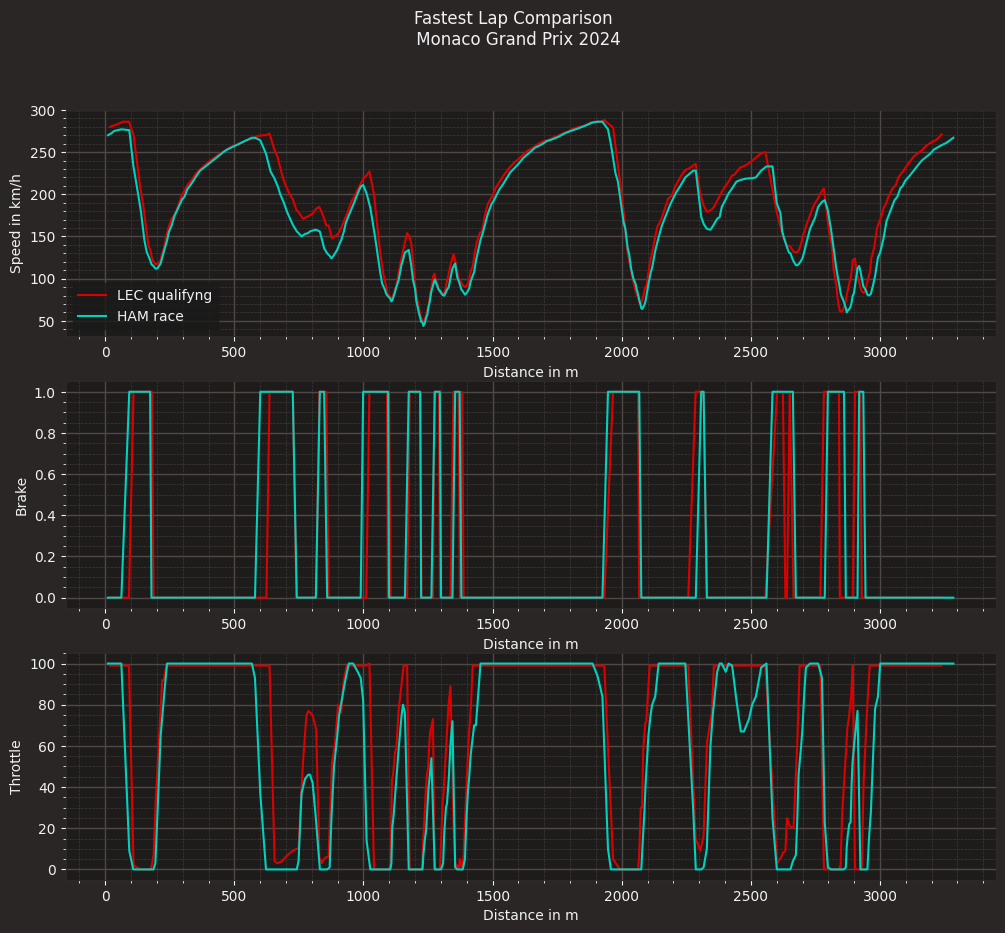

In [ ]:
color1 = ff1.plotting.team_color('mercedes')
color2 = ff1.plotting.team_color('ferrari')

plt.rcParams['figure.figsize'] = [12, 10]
fig, ax = plt.subplots(3)

fig.suptitle("Fastest Race Lap Telemetry Comparison")

ax[0].plot(quali_cdata['Distance'], quali_cdata['Speed'], label='LEC qualifyng',color=color2)
ax[0].plot(race_cdata['Distance'], race_cdata['Speed'], label='HAM race', color=color1)
ax[0].set_xlabel('Distance in m')
ax[0].set_ylabel('Speed in km/h')
ax[0].legend()

ax[1].plot(quali_cdata['Distance'], quali_cdata['Brake'], label='LEC qualifyng',color=color2)
ax[1].plot(race_cdata['Distance'], race_cdata['Brake'], label='HAM race', color=color1)
ax[1].set_xlabel('Distance in m')
ax[1].set_ylabel('Brake')


ax[2].plot(quali_cdata['Distance'], quali_cdata['Throttle'], label='LEC qualifyng',color=color2)
ax[2].plot(race_cdata['Distance'], race_cdata['Throttle'], label='HAM race', color=color1)
ax[2].set_xlabel('Distance in m')
ax[2].set_ylabel('Throttle')


plt.suptitle(f"Fastest Lap Comparison  \n "
f"{race.event['EventName']} {race.event.year}")


plt.show()

# **Draw a track map with numbered corners**

In [ ]:
#fastest_lap = race.laps.pick_fastest()
pos = fastest_lap.get_pos_data()
circuit_info = race.get_circuit_info()

DEBUG:requests_cache.policy.actions:Cache directives from request headers: CacheDirectives()
DEBUG:requests_cache.policy.actions:Pre-read cache checks: Passed
DEBUG:requests_cache.policy.actions:Post-read cache actions: CacheActions(expire_after=datetime.timedelta(seconds=43200), send_request=True)
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.multiviewer.app:443
DEBUG:urllib3.connectionpool:https://api.multiviewer.app:443 "GET /api/v1/circuits/22/2024 HTTP/1.1" 200 None
DEBUG:requests_cache.policy.actions:Cache directives from response headers: CacheDirectives(stale_if_error=600, stale_while_revalidate=120, last_modified='Sat, 01 Jun 2024 23:05:48 GMT')
DEBUG:requests_cache.policy.actions:Pre-write cache checks: Passed


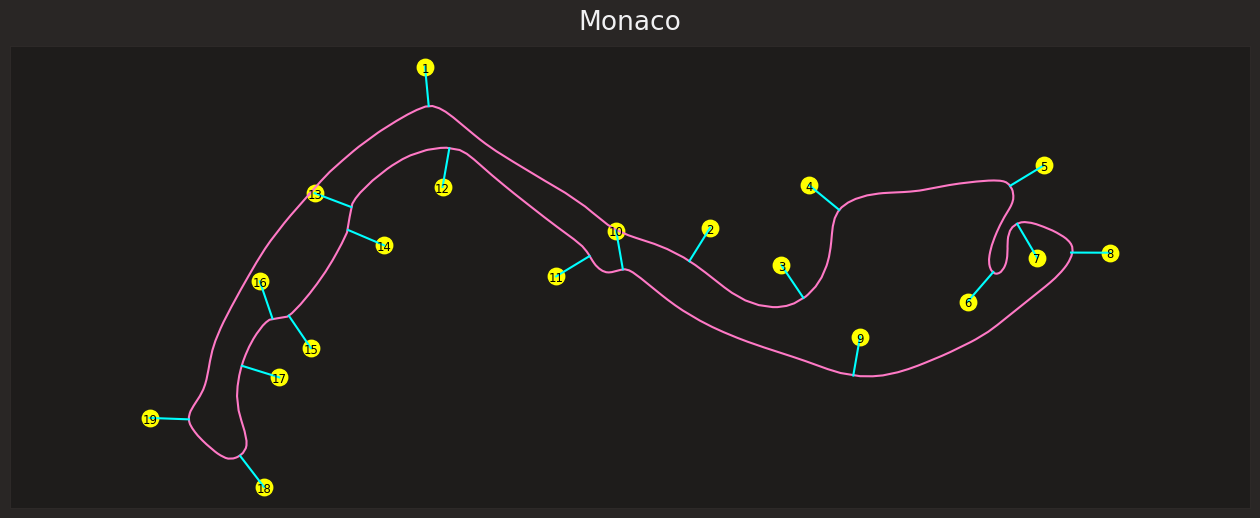

In [ ]:
def rotate(xy, *, angle):
    rot_mat = np.array([[np.cos(angle), np.sin(angle)],
                        [-np.sin(angle), np.cos(angle)]])
    return np.matmul(xy, rot_mat)

    # Get an array of shape [n, 2] where n is the number of points and the second
# axis is x and y.
track = pos.loc[:, ('X', 'Y')].to_numpy()

# Convert the rotation angle from degrees to radian.
track_angle = circuit_info.rotation / 180 * np.pi

# Rotate and plot the track map.
rotated_track = rotate(track, angle=track_angle)
plt.plot(rotated_track[:, 0], rotated_track[:, 1])

offset_vector = [500, 0]  # offset length is chosen arbitrarily to 'look good'

# Iterate over all corners.
for _, corner in circuit_info.corners.iterrows():
    # Create a string from corner number and letter
    txt = f"{corner['Number']}{corner['Letter']}"

    # Convert the angle from degrees to radian.
    offset_angle = corner['Angle'] / 180 * np.pi

    # Rotate the offset vector so that it points sideways from the track.
    offset_x, offset_y = rotate(offset_vector, angle=offset_angle)

    # Add the offset to the position of the corner
    text_x = corner['X'] + offset_x
    text_y = corner['Y'] + offset_y

    # Rotate the text position equivalently to the rest of the track map
    text_x, text_y = rotate([text_x, text_y], angle=track_angle)

    # Rotate the center of the corner equivalently to the rest of the track map
    track_x, track_y = rotate([corner['X'], corner['Y']], angle=track_angle)

    # Draw a circle next to the track.
    plt.scatter(text_x, text_y, color='yellow', s=140)

    # Draw a line from the track to this circle.
    plt.plot([track_x, text_x], [track_y, text_y], color='cyan')

    # Finally, print the corner number inside the circle.
    plt.text(text_x, text_y, txt,
             va='center_baseline', ha='center', size='small', color='black')

    plt.title(race.event['Location'])
plt.xticks([])
plt.yticks([])
plt.axis('equal')
plt.show()

In [ ]:
race_tel=racebstlap.get_telemetry()
quali_tel=qualibstlap.get_telemetry()

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


In [ ]:
race_tel

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z
2,2024-05-26 15:06:33.574,0 days 02:58:28.185000,,250.320556,0 days 00:00:00,11047,267,7,100,False,0,interpolation,0.023088,0.000007,OnTrack,-7661,-6607,502
3,2024-05-26 15:06:33.591,0 days 02:58:28.202000,,250.320556,0 days 00:00:00.017000,11071,268,7,100,False,0,pos,1.296757,0.000394,OnTrack,-7663,-6595,502
4,2024-05-26 15:06:33.771,0 days 02:58:28.382000,,250.320556,0 days 00:00:00.197000,11120,269,7,100,False,0,pos,14.822514,0.004502,OnTrack,-7671,-6460,502
5,2024-05-26 15:06:33.891,0 days 02:58:28.502000,,250.320556,0 days 00:00:00.317000,11168,270,7,100,False,0,pos,23.880090,0.007252,OnTrack,-7676,-6370,503
6,2024-05-26 15:06:33.941,0 days 02:58:28.552000,,250.320556,0 days 00:00:00.367000,11217,271,7,100,False,0,car,27.663611,0.008401,OnTrack,-7677,-6332,503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582,2024-05-26 15:07:47.251,0 days 02:59:41.862000,1,189.105833,0 days 00:01:13.677000,10740,261,7,100,False,0,pos,3247.326656,0.986201,OnTrack,-7640,-6950,502
583,2024-05-26 15:07:47.422,0 days 02:59:42.033000,1,182.261389,0 days 00:01:13.848000,10835,264,7,100,False,0,car,3259.919167,0.990025,OnTrack,-7651,-6774,501
584,2024-05-26 15:07:47.591,0 days 02:59:42.202000,1,176.039167,0 days 00:01:14.017000,10928,266,7,100,False,0,pos,3272.472960,0.993838,OnTrack,-7663,-6596,502
585,2024-05-26 15:07:47.702,0 days 02:59:42.313000,1,169.816944,0 days 00:01:14.128000,11021,268,7,100,False,0,car,3280.763611,0.996356,OnTrack,-7667,-6522,502


In [ ]:
x= np.array(race_tel['X'].values)
y= np.array(race_tel['Y'].values)

points= np.array([x,y]).T.reshape(-1,1,2)
segments = np.concatenate([points[:-1],points[1:]],axis=1)
gear=race_tel['nGear'].to_numpy().astype(float)

<ipython-input-20-c3fddf1e6ca0>:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap('Dark2')


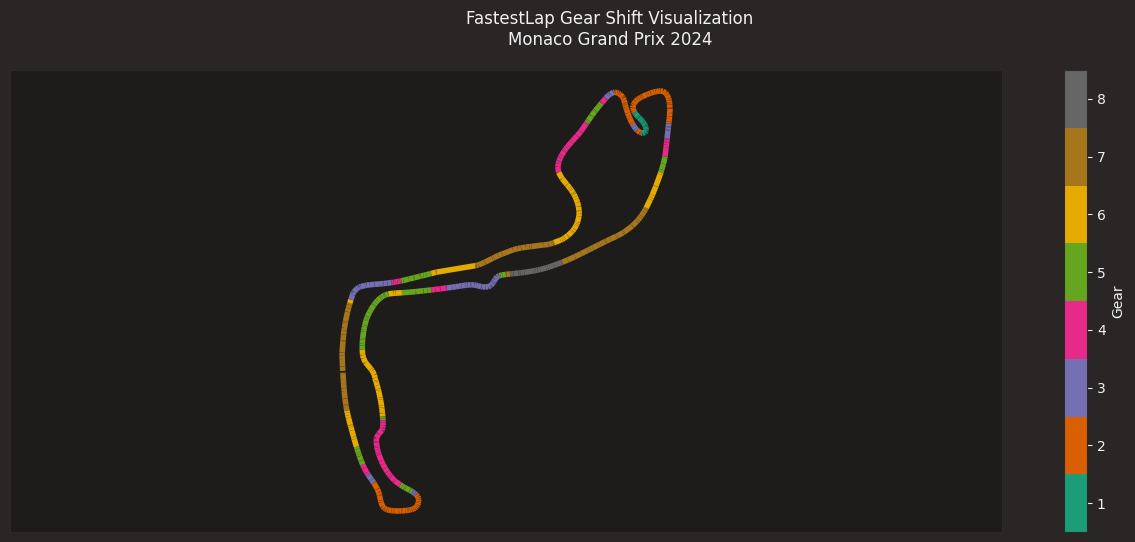

In [ ]:
cmap=cm.get_cmap('Dark2')
lc_comp=LineCollection(segments, norm=plt.Normalize(1, cmap.N+1),cmap=cmap)
lc_comp.set_array(gear)
lc_comp.set_linewidth(4)

plt.rcParams['figure.figsize'] = [16, 6]
#Create the plot

plt.gca().add_collection(lc_comp)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)
tittle=plt.suptitle(
    f"FastestLap Gear Shift Visualization\n"
    f"{race.event['EventName']} {race.event.year}"
)
#Add colorbar

cbar=plt.colorbar(mappable=lc_comp, label="Gear", boundaries=np.arange(1, 10))
cbar.set_ticks(np.arange(1.5, 9.5))
cbar.set_ticklabels(np.arange(1, 9))
plt.show()

/usr/local/lib/python3.10/dist-packages/fastf1/utils.py:91: FutureWarning: `utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.
  warnings.warn("`utils.delta_time` is considered deprecated and will"


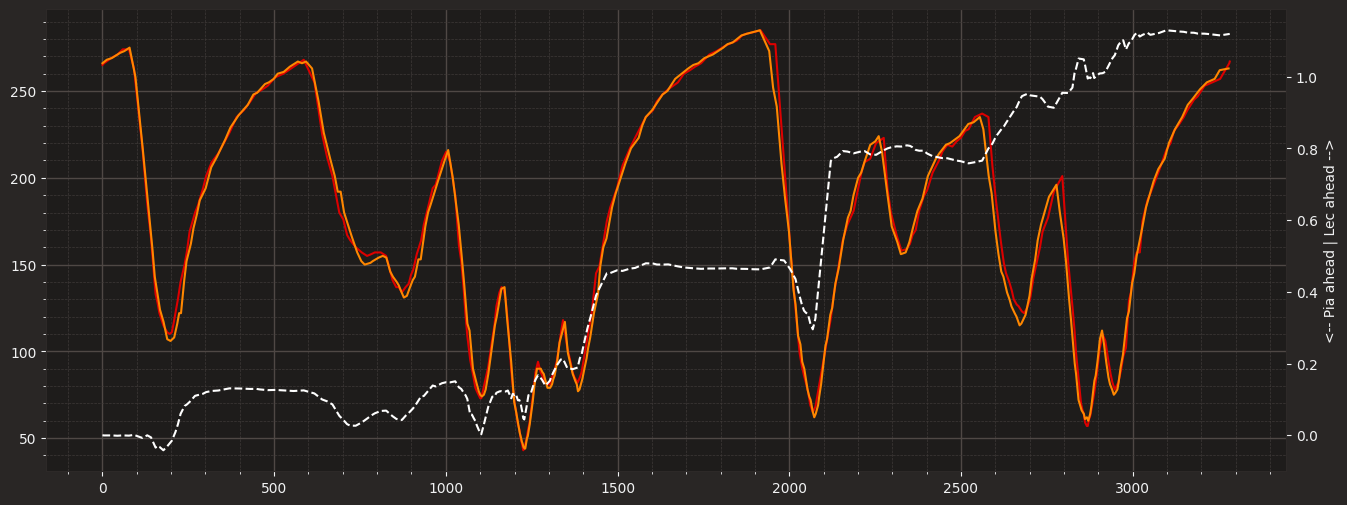

In [ ]:

from fastf1 import utils


lec = race.laps.pick_driver('LEC').pick_fastest()
pia = race.laps.pick_driver('PIA').pick_fastest()

delta_time, ref_tel, compare_tel = utils.delta_time(lec, pia)
# lec is reference, lec is compared

fig, ax = plt.subplots()
# use telemetry returned by .delta_time for best accuracy,
# this ensure the same applied interpolation and resampling
ax.plot(ref_tel['Distance'], ref_tel['Speed'],
        color=plotting.team_color(lec['Team']))
ax.plot(compare_tel['Distance'], compare_tel['Speed'],
        color=plotting.team_color(pia['Team']))

twin = ax.twinx()
twin.plot(ref_tel['Distance'], delta_time, '--', color='white')
twin.set_ylabel("<-- Pia ahead | Lec ahead -->")
plt.show()

# **Position change during a race**

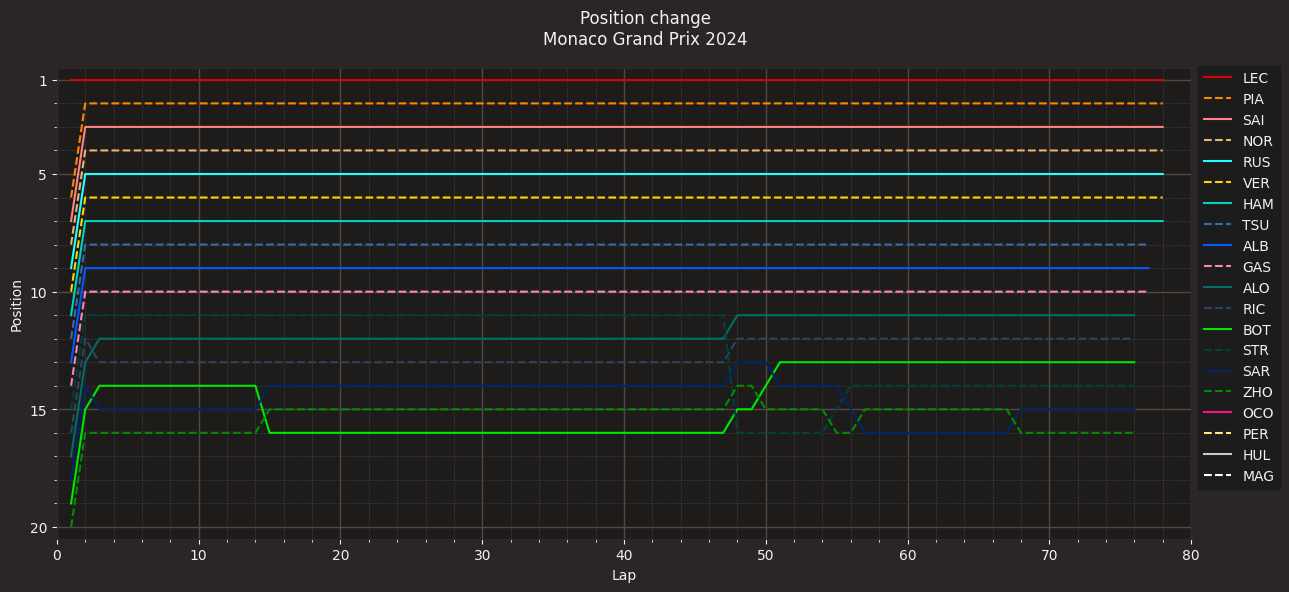

In [ ]:
fig, ax = plt.subplots(figsize=(13, 6))

line_styles = ['-', '--']  # Estilos de línea para alternar
#'-', '--', '-.', ':', 'None', ' ', '','solid', 'dashed', 'dashdot', 'dotted'
style_index = 0  # Índice para seleccionar el estilo de línea

for drv in race.drivers:
    drv_laps = race.laps.pick_driver(drv)

    abb = drv_laps['Driver'].iloc[0]
    color = ff1.plotting.driver_color(abb)

    ax.plot(drv_laps['LapNumber'], drv_laps['Position'],
            label=abb, color=color,  linestyle=line_styles[style_index])

    style_index = (style_index + 1) % len(line_styles)  # Alternar estilo de línea

ax.set_ylim([20.5, 0.5])
ax.set_xlim([0, 80])
ax.set_yticks([1, 5, 10, 15, 20])
#ax.set_xticks([0, 5, 10, 15, 20, 80])
ax.set_xlabel('Lap')
ax.set_ylabel('Position')

tittle=plt.suptitle(
    f"Position change\n"
    f"{race.event['EventName']} {race.event.year}"
)

ax.legend(bbox_to_anchor=(1.0, 1.02))
plt.tight_layout()

plt.show()

In [ ]:
laps = race.laps.pick_quicklaps()


In [ ]:
transformed_laps = laps.copy()
transformed_laps.loc[:, "LapTime (s)"] = laps["LapTime"].dt.total_seconds()

# order the team from the fastest (lowest median lap time) tp slower
team_order = (
    transformed_laps[["Team", "LapTime (s)"]]
    .groupby("Team")
    .median()["LapTime (s)"]
    .sort_values()
    .index
)
print(team_order)

# make a color palette associating team names to hex codes
team_palette = {team: ff1.plotting.team_color(team) for team in team_order}

Index(['Red Bull Racing', 'Mercedes', 'Williams', 'Ferrari', 'McLaren', 'RB',
       'Alpine', 'Kick Sauber', 'Aston Martin'],
      dtype='object', name='Team')


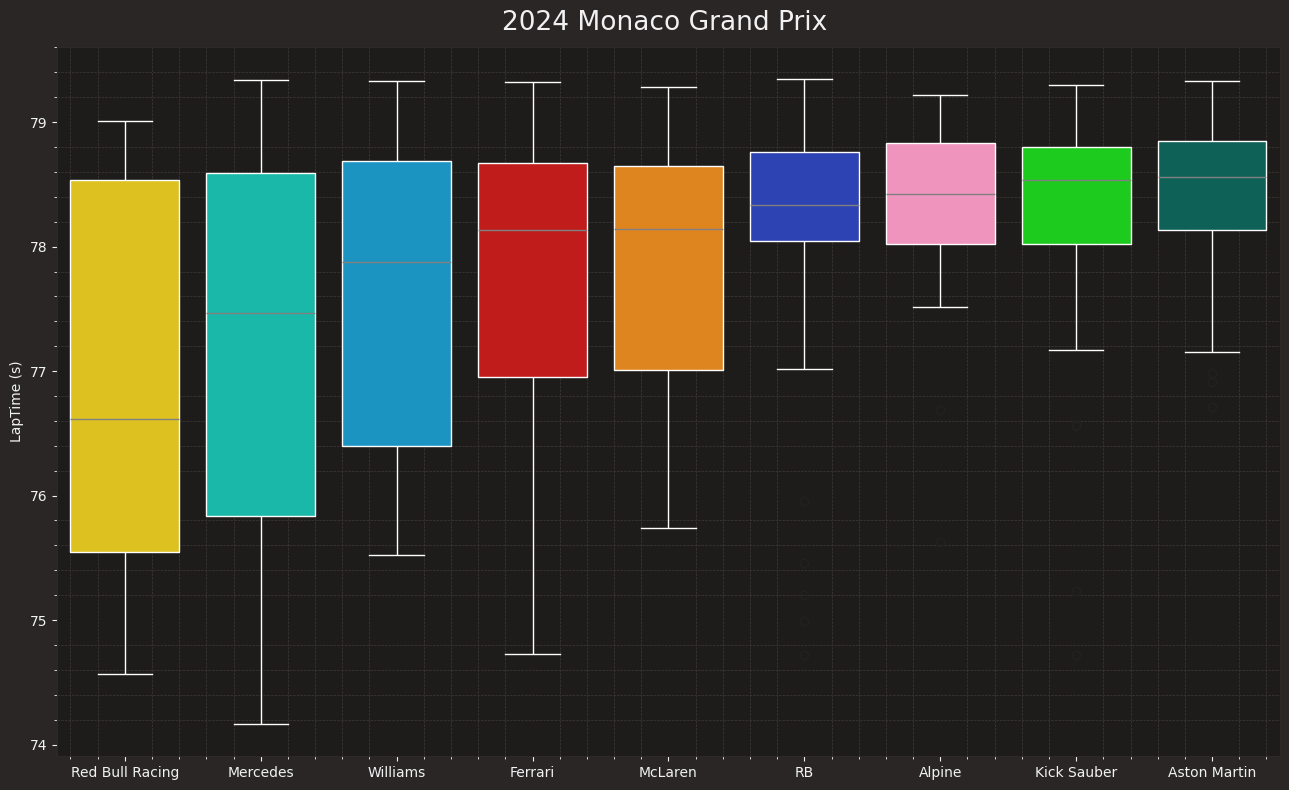

In [ ]:
fig, ax = plt.subplots(figsize=(13, 8))
sns.boxplot(
    data=transformed_laps,
    x="Team",
    y="LapTime (s)",
    hue="Team",
    order=team_order,
    palette=team_palette,
    whiskerprops=dict(color="white"),
    boxprops=dict(edgecolor="white"),
    medianprops=dict(color="grey"),
    capprops=dict(color="white"),
)

plt.title(f"{race.event.year} {race.event['EventName']} ")
plt.grid(visible=False)

# x-label is redundant
ax.set(xlabel=None)
plt.tight_layout()
plt.show()

# **Ty strategies during a race**

In [ ]:
laps = race.laps

In [ ]:
drivers = race.drivers

In [ ]:
drivers = [race.get_driver(driver)["Abbreviation"] for driver in drivers]

In [ ]:
stints = laps[["Driver", "Stint", "Compound", "LapNumber"]]
stints = stints.groupby(["Driver", "Stint", "Compound"])
stints = stints.count().reset_index()

In [ ]:
stints = stints.rename(columns={"LapNumber": "StintLength"})
stints

,Driver,Stint,Compound,StintLength
0,ALB,1.0,MEDIUM,1
1,ALB,2.0,HARD,76
2,ALO,1.0,HARD,1
3,ALO,2.0,MEDIUM,75
4,BOT,1.0,HARD,1
5,BOT,2.0,MEDIUM,14
6,BOT,3.0,HARD,61
7,GAS,1.0,HARD,1
8,GAS,2.0,MEDIUM,76
9,HAM,1.0,HARD,1


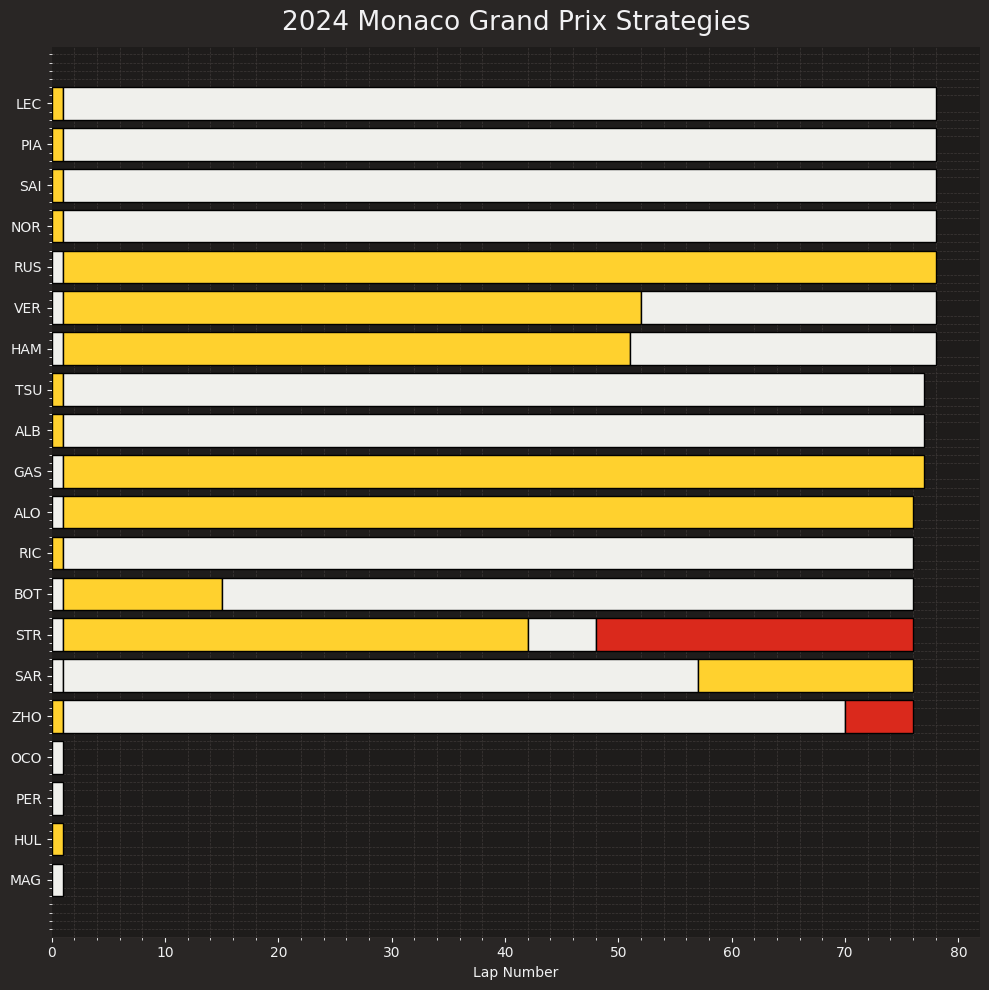

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

for driver in drivers:
    driver_stints = stints.loc[stints["Driver"] == driver]

    previous_stint_end = 0
    for idx, row in driver_stints.iterrows():
        # each row contains the compound name and stint length
        # we can use these information to draw horizontal bars
        plt.barh(
            y=driver,
            width=row["StintLength"],
            left=previous_stint_end,
            color=ff1.plotting.COMPOUND_COLORS[row["Compound"]],
            edgecolor="black",
            fill=True
        )

        previous_stint_end += row["StintLength"]

        plt.title(f"{race.event.year} {race.event['EventName']} Strategies")
plt.xlabel("Lap Number")
plt.grid(False)
# invert the y-axis so drivers that finish higher are closer to the top
ax.invert_yaxis()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()